### Overview

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. 

Huh! Here we take on the challenge! 

As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. 

#### Dataset
Size of training set: `10683` records Size of test set: `2671` records 

#### FEATURES: 
* Airline: The name of the airline 
* Date_of_Journey: The date of the journey 
* Source: The source from which the service begins 
* Destination: The destination where the service ends
* Route: The route taken by the flight to reach the destination
* Dep_Time: The time when the journey starts from the source
* Arrival_Time: Time of arrival at the destination
* Duration: Total duration of the flight
* Total_Stops: Total stops between the source and destination
* Additional_Info: Additional information about the flight 
* Price: The price of the ticket

In [1]:
# importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 25)

In [3]:
# load train dataset
df_train = pd.read_excel('Data_Train.xlsx')
df_train.shape

(10683, 11)

In [4]:
# load test dataset
df_test = pd.read_excel('Test_set.xlsx')
df_test.shape

(2671, 10)

In [5]:
# view top 5 rows
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
# check features information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
# check for missing values
df_train.isnull().sum().sort_values(ascending=False)

Route              1
Total_Stops        1
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Additional_Info    0
Price              0
dtype: int64

In [8]:
# view missing data points
df_train[df_train.Route.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
# view missing data points
df_train[df_train.Total_Stops.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


As we can see, for features `Route` and `Total_Stops` be have missing value in same data point. We will drop this data point.

In [10]:
# filter out missing value
df_train = df_train[~df_train.Route.isnull()]
df_train.shape

(10682, 11)

In [11]:
# view statistical details
df_train.describe([.25, .5, .75, .9, .95, .98, .99])

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
90%,14714.000000
95%,15764.000000
98%,18371.000000


In [12]:
# view top 5 rows
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [13]:
# check features information
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [14]:
# check for missing values
df_test.isnull().sum().sort_values(ascending=False)

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

As we can see there are no missing values in test set

### EDA

In [15]:
# view value counts for "Total_Stops" feature
df_train.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [16]:
result_df = (
  df_train
  .groupby(['Source'])
  .apply(lambda x: pd.Series({
      'nb_flights': len(x['Source'])
  }))
  .reset_index()
)
result_df.head()

,Source,nb_flights
0,Banglore,2197
1,Chennai,381
2,Delhi,4536
3,Kolkata,2871
4,Mumbai,697


In [17]:
result_df = (
  df_train
  .groupby(['Destination'])
  .apply(lambda x: pd.Series({
      'nb_flights': len(x['Destination'])
  }))
  .reset_index()
)
result_df.head()

,Destination,nb_flights
0,Banglore,2871
1,Cochin,4536
2,Delhi,1265
3,Hyderabad,697
4,Kolkata,381


In [18]:
# derive number of flight hours from "Duration" feature
df_train['Duration_Hrs'] = df_train.Duration.apply(lambda val: val.split(' ')[0])
df_test['Duration_Hrs'] = df_test.Duration.apply(lambda val: val.split(' ')[0])

In [19]:
# filter flights with "Duration" equals to 5 minutes
df_train[df_train.Duration_Hrs=='5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Hrs
6474,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,17327,5m


Now this is not possible, a flight with 2 stops having flight duration of 5m, so we will drop this data point.

In [20]:
# dropping the data point
df_train.drop([6474], axis=0, inplace=True)
df_train.shape

(10681, 12)

In [21]:
# view value count for "Additional_Info"
df_train.Additional_Info.value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [22]:
df_train.Arrival_Time = df_train.Arrival_Time.apply(lambda x: x[:6] if len(x) > 6 else x)
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Hrs
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,2h
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7h
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,19h
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5h
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4h


In [23]:
# dropping "Route" feature from train set
df_train.drop('Route', axis=1, inplace=True)
df_train.shape

(10681, 11)

In [24]:
# dropping "Route" feature from train set
df_test.drop('Route', axis=1, inplace=True)
df_test.shape

(2671, 10)

In [25]:
# derive feature for flight departure and arrival hours for train set
df_train['Dep_Time_Hrs'] = df_train.Dep_Time.apply(lambda x: x.split(':')[0])
df_train['Arrival_Time_Hrs'] = df_train.Arrival_Time.apply(lambda x: x.split(':')[0])

In [26]:
# derive feature for flight departure and arrival hours for test set
df_test['Dep_Time_Hrs'] = df_test.Dep_Time.apply(lambda x: x.split(':')[0])
df_test['Arrival_Time_Hrs'] = df_test.Arrival_Time.apply(lambda x: x.split(':')[0])

In [27]:
# convert feature type from object to mumeric data type
df_train.Dep_Time_Hrs = pd.to_numeric(df_train.Dep_Time_Hrs)
df_train.Arrival_Time_Hrs = pd.to_numeric(df_train.Arrival_Time_Hrs)

In [28]:
# create categorical feature for departure and arrival time
df_train['Dep_Time_Cat'] = pd.cut(
    df_train.Dep_Time_Hrs, 
    bins=[0.0, 6.0, 12.0, 18.0, 24.0], 
    labels=['early-morning', 'morning', 'afternoon', 'late-night']
)
df_train['Arrival_Time_Cat'] = pd.cut(
    df_train.Arrival_Time_Hrs, 
    bins=[0.0, 6.0, 12.0, 18.0, 24.0], 
    labels=['early-morning', 'morning', 'afternoon', 'late-night']
)

In [29]:
# derive feature for flight departure and arrival hours
df_test['Dep_Time_Hrs'] = df_test.Dep_Time.apply(lambda x: x.split(':')[0])
df_test['Arrival_Time_Hrs'] = df_test.Arrival_Time.apply(lambda x: x.split(':')[0])

In [30]:
# convert feature type from object to mumeric data type
df_test.Dep_Time_Hrs = pd.to_numeric(df_test.Dep_Time_Hrs)
df_test.Arrival_Time_Hrs = pd.to_numeric(df_test.Arrival_Time_Hrs)

In [31]:
# create categorical feature for departure and arrival time
df_test['Dep_Time_Cat'] = pd.cut(
    df_test.Dep_Time_Hrs, 
    bins=[0.0, 6.0, 12.0, 18.0, 24.0], 
    labels=['early-morning', 'morning', 'afternoon', 'late-night']
)
df_test['Arrival_Time_Cat'] = pd.cut(
    df_test.Arrival_Time_Hrs, 
    bins=[0.0, 6.0, 12.0, 18.0, 24.0], 
    labels=['early-morning', 'morning', 'afternoon', 'late-night']
)

In [32]:
# view value count for newly derived feature
df_train.Dep_Time_Cat.value_counts()

morning          3773
afternoon        2869
late-night       2258
early-morning    1741
Name: Dep_Time_Cat, dtype: int64

In [33]:
# view value count for newly derived feature
df_train.Arrival_Time_Cat.value_counts()

late-night       3838
morning          3048
afternoon        1859
early-morning    1614
Name: Arrival_Time_Cat, dtype: int64

In [34]:
# derive new features "Journey_Day" and "Journey_Month" from "Date_of_Journey" feature for train set
df_train['Journey_Day'] = pd.DatetimeIndex(df_train['Date_of_Journey']).day
df_train['Journey_Month'] = pd.DatetimeIndex(df_train['Date_of_Journey']).month

In [35]:
# derive new features "Journey_Day" and "Journey_Month" from "Date_of_Journey" feature for test set
df_test['Journey_Day'] = pd.DatetimeIndex(df_test['Date_of_Journey']).day
df_test['Journey_Month'] = pd.DatetimeIndex(df_test['Date_of_Journey']).month

In [36]:
# get total flight duration in minutes from "Duration" feature for train set
df_train['Duration_Total_Min'] = df_train.Duration.apply(lambda x: int(x.split(' ')[0][:-1])*60 + int(x.split(' ')[1][:-1]) 
                                                         if len(x.split(' ')) > 1 else int(x[:-1])*60)

In [37]:
# get total flight duration in minutes from "Duration" feature for test set
df_test['Duration_Total_Min'] = df_test.Duration.apply(lambda x: int(x.split(' ')[0][:-1])*60 + int(x.split(' ')[1][:-1]) 
                                                         if len(x.split(' ')) > 1 else int(x[:-1])*60)

In [38]:
# get weekday and weekend from "Date_of_Journey" feature for train set
df_train['Date_of_Journey'] = pd.to_datetime(df_train['Date_of_Journey'])
df_train['Day_of_Week'] = df_train['Date_of_Journey'].dt.weekday
df_train['Day_of_Week'] = np.where(df_train['Day_of_Week'] >= 5, 'weekend', 'weekday')

In [39]:
# get weekday and weekend from "Date_of_Journey" feature for test set
df_test['Date_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Week'] = df_test['Date_of_Journey'].dt.weekday
df_test['Day_of_Week'] = np.where(df_test['Day_of_Week'] >= 5, 'weekend', 'weekday')

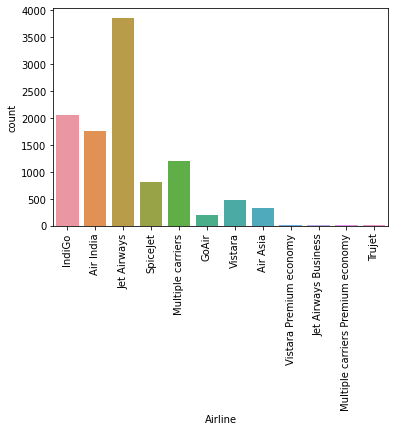

In [40]:
# plotting flight counts for airlines
sns.countplot(x='Airline', data=df_train)
plt.xticks(rotation=90) # Rotates X-Axis Ticks by 90-degrees
plt.show()

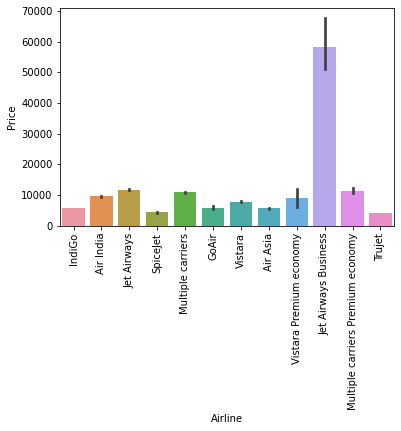

In [41]:
# plotting price by airline
sns.barplot(x='Airline', y='Price', data=df_train)
plt.xticks(rotation=90) # Rotates X-Axis Ticks by 90-degrees
plt.show()

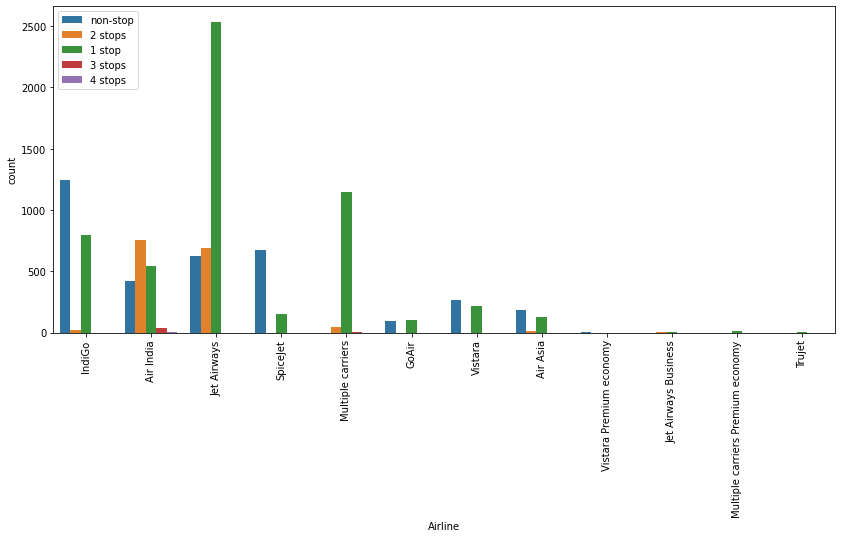

In [42]:
plt.figure(figsize=(14,6))
sns.countplot(x='Airline', hue='Total_Stops', data=df_train)
plt.xticks(rotation=90) # Rotates X-Axis Ticks by 90-degrees
plt.legend(loc='best')
plt.show()

As we can see most of the flight are traveled Non stop and One stop

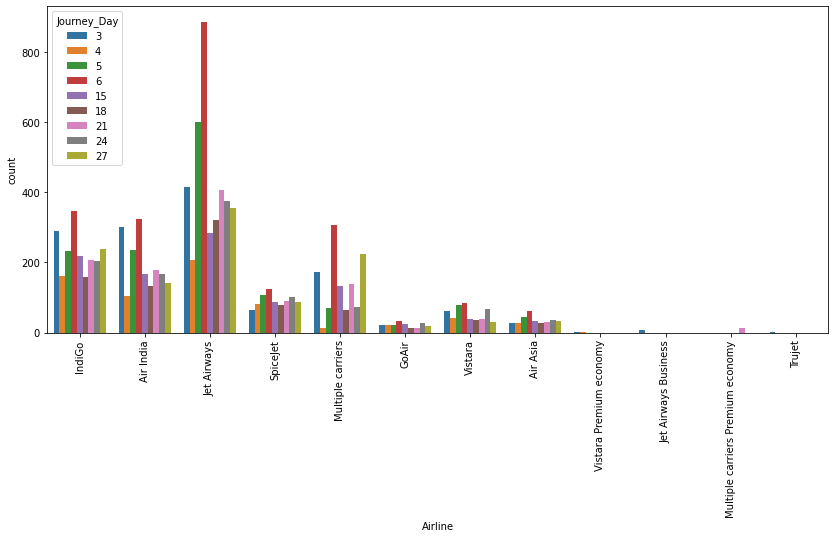

In [43]:
plt.figure(figsize=(14,6))
sns.countplot(x='Airline', hue='Journey_Day', data=df_train)
plt.xticks(rotation=90) # Rotates X-Axis Ticks by 90-degrees
plt.show()

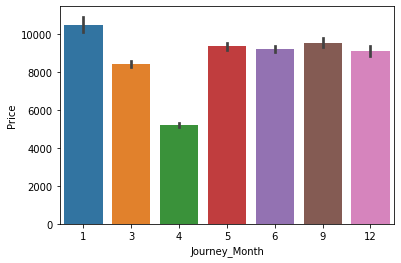

In [44]:
sns.barplot(x='Journey_Month', y='Price', data=df_train)
plt.show()

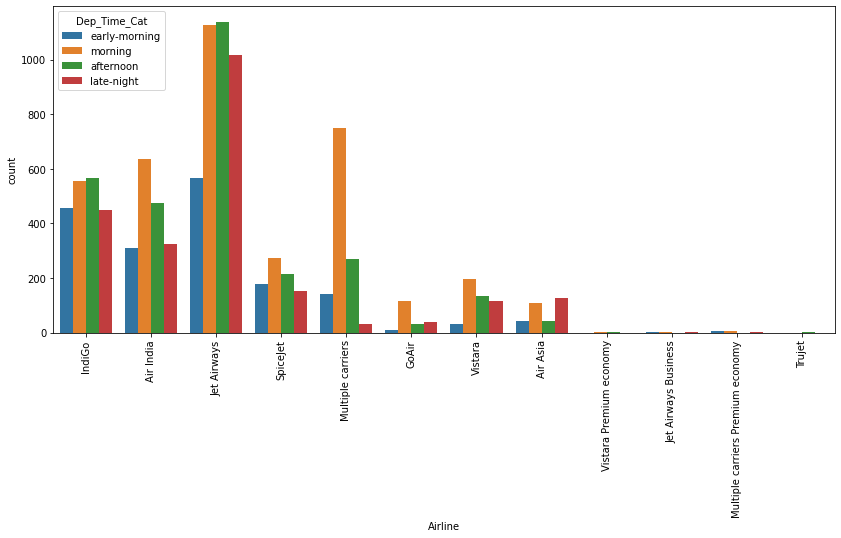

In [45]:
plt.figure(figsize=(14,6))
sns.countplot(x='Airline', hue='Dep_Time_Cat', data=df_train)
plt.xticks(rotation=90) # Rotates X-Axis Ticks by 90-degrees
plt.show()

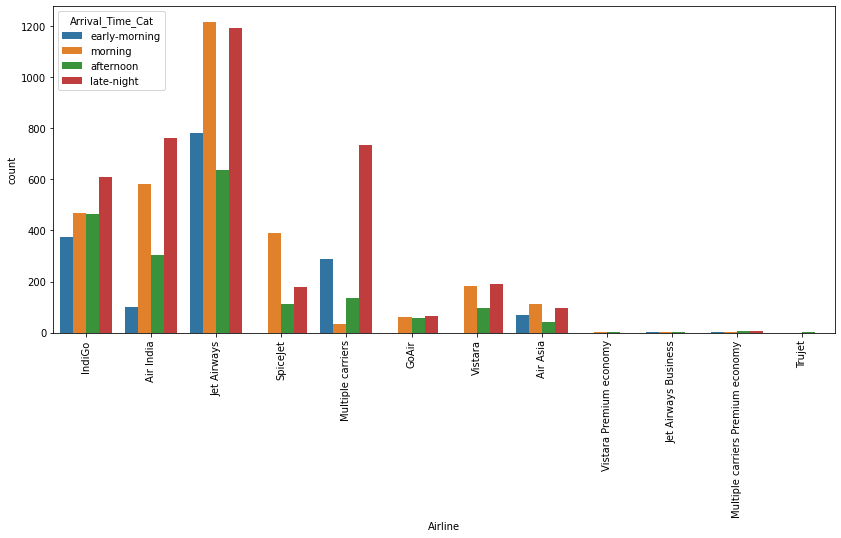

In [46]:
plt.figure(figsize=(14,6))
sns.countplot(x='Airline', hue='Arrival_Time_Cat', data=df_train)
plt.xticks(rotation=90) # Rotates X-Axis Ticks by 90-degrees
plt.show()

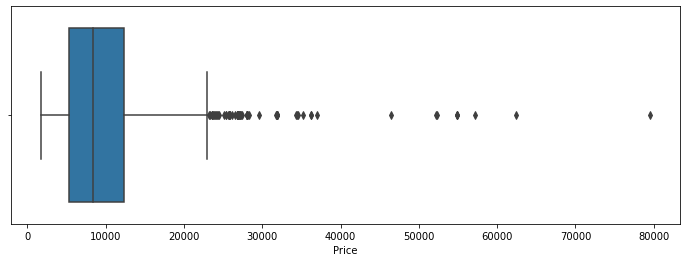

In [47]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df_train.Price)
plt.show()

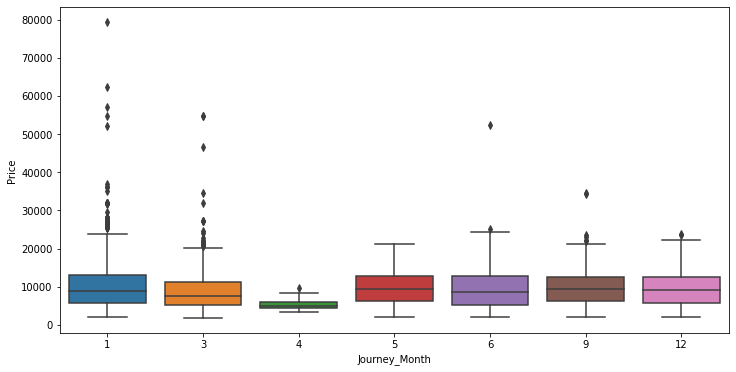

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Journey_Month', y='Price', data=df_train)
plt.show()

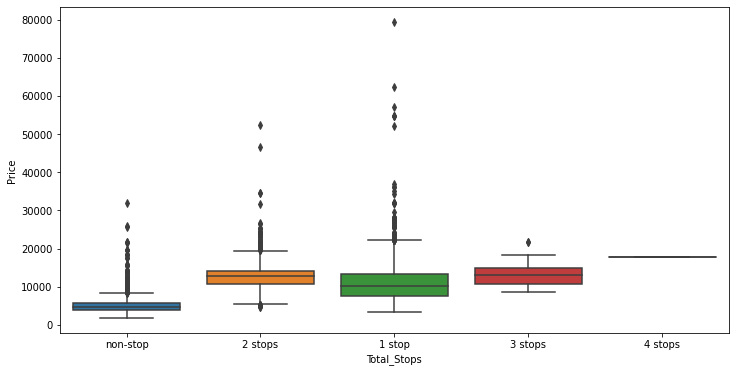

In [49]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Total_Stops', y='Price', data=df_train)
plt.show()

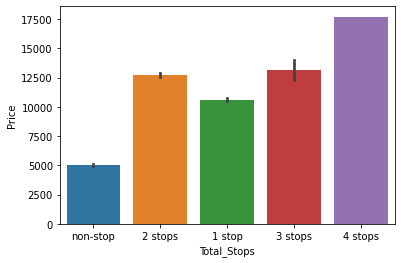

In [50]:
sns.barplot(x='Total_Stops', y='Price', data=df_train)
plt.show()

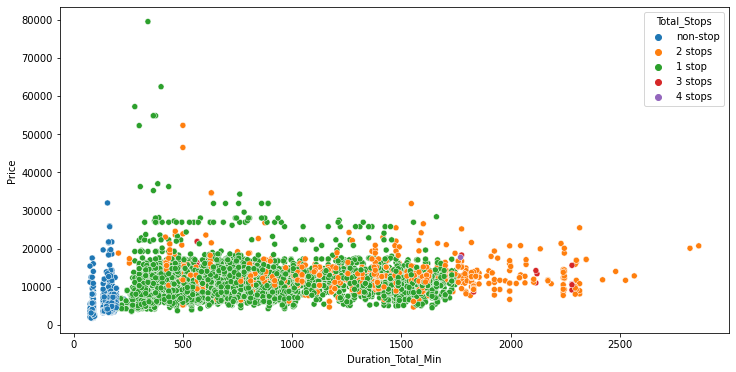

In [51]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Duration_Total_Min', y='Price', data=df_train, hue='Total_Stops')
plt.show()

non-stop flights are of shorter duration and flight price is also less

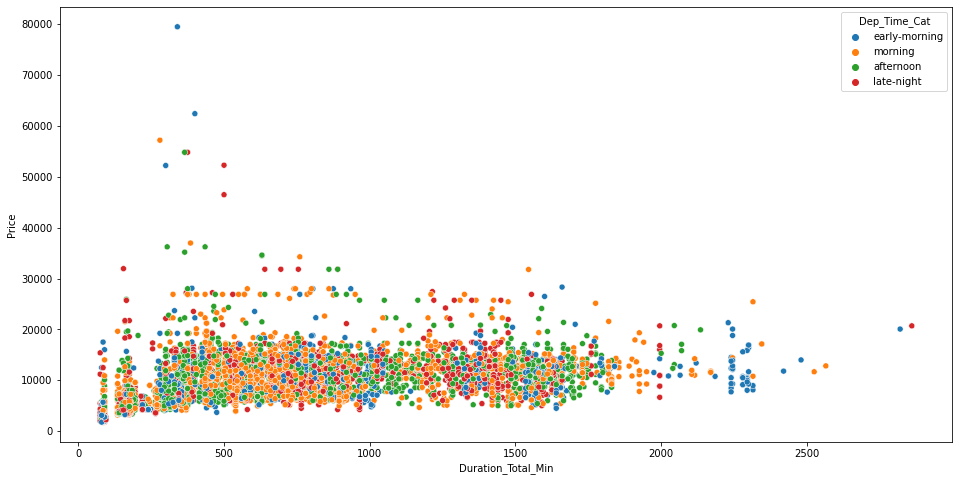

In [52]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='Duration_Total_Min', y='Price', data=df_train, hue='Dep_Time_Cat')
plt.show()

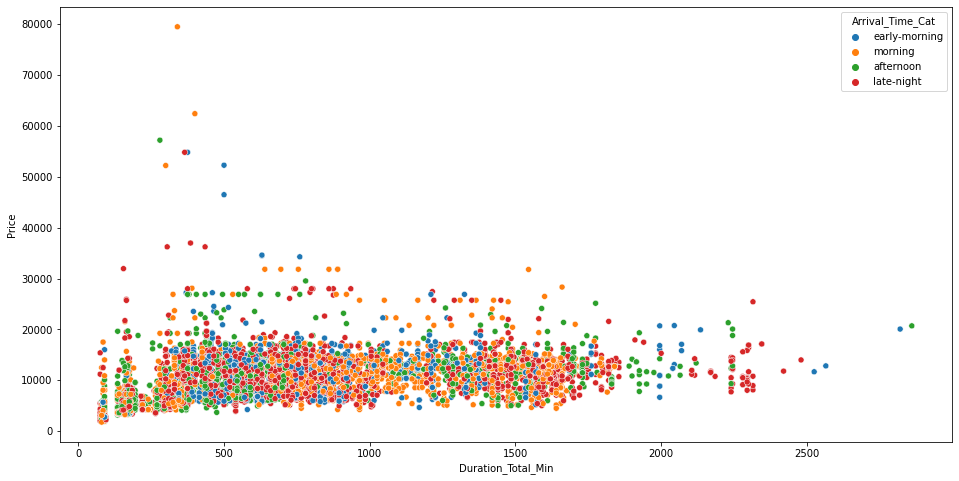

In [53]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='Duration_Total_Min', y='Price', data=df_train, hue='Arrival_Time_Cat')
plt.show()

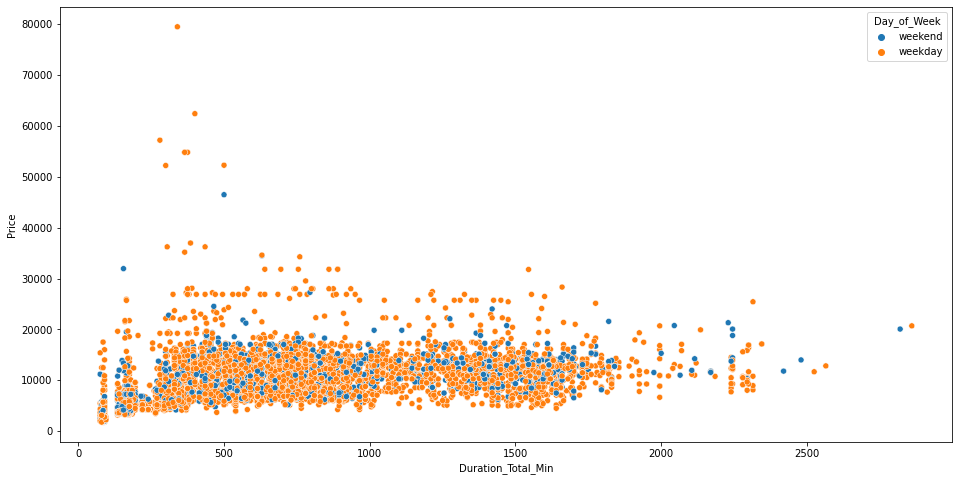

In [54]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='Duration_Total_Min', y='Price', data=df_train, hue='Day_of_Week')
plt.show()

### Handle Categorical Features

In [55]:
# view top 5 rows
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Hrs,Dep_Time_Hrs,Arrival_Time_Hrs,Dep_Time_Cat,Arrival_Time_Cat,Journey_Day,Journey_Month,Duration_Total_Min,Day_of_Week
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10,2h 50m,non-stop,No info,3897,2h,22,1,late-night,early-morning,24,3,170,weekend
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,7h,5,13,early-morning,afternoon,5,1,445,weekend
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25,19h,2 stops,No info,13882,19h,9,4,morning,early-morning,6,9,1140,weekday
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,5h,18,23,afternoon,late-night,5,12,325,weekday
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,4h,16,21,afternoon,late-night,3,1,285,weekday


In [56]:
# view unique airline in train set
df_train.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [57]:
# view unique airline in test set
df_test.Airline.unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [58]:
# check for unique airlines count
print('train set:', len(df_train.Airline.unique()))
print('test set:', len(df_test.Airline.unique()))

train set: 12
test set: 11


Airline `Trujet` is not available in test set

In [59]:
# view records
df_train[df_train.Airline=='Trujet']

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Hrs,Dep_Time_Hrs,Arrival_Time_Hrs,Dep_Time_Cat,Arrival_Time_Cat,Journey_Day,Journey_Month,Duration_Total_Min,Day_of_Week
2878,Trujet,2019-06-03,Mumbai,Hyderabad,13:05,16:20,3h 15m,1 stop,No info,4140,3h,13,16,afternoon,afternoon,3,6,195,weekday


In [60]:
# dropping record belonging to "Trujet" airline
df_train.drop([2878], axis=0, inplace=True)
df_train.shape

(10680, 19)

In [61]:
print('train set (Source):', df_train.Source.unique())
print('test set (Source):', df_test.Source.unique())

train set (Source): ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
test set (Source): ['Delhi' 'Kolkata' 'Banglore' 'Mumbai' 'Chennai']


In [62]:
# check for unique source count
print('train set:', len(df_train.Source.unique()))
print('test set:', len(df_test.Source.unique()))

train set: 5
test set: 5


In [63]:
print('train set (Destination):', df_train.Destination.unique())
print('test set (Destination):', df_test.Destination.unique())

train set (Destination): ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
test set (Destination): ['Cochin' 'Banglore' 'Delhi' 'New Delhi' 'Hyderabad' 'Kolkata']


In [64]:
# check for unique destination count
print('train set:', len(df_train.Destination.unique()))
print('test set:', len(df_test.Destination.unique()))

train set: 6
test set: 6


As we can see we have `Delhi` and `New Delhi` as destination in train and test set.

In [65]:
# replace "Destination" -> New Delhi with Delhi for train set
df_train.Destination = np.where(df_train.Destination=='New Delhi','Delhi', df_train.Destination)
df_train.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     695
Kolkata       381
Name: Destination, dtype: int64

In [66]:
# replace "Destination" -> New Delhi with Delhi for test set
df_test.Destination = np.where(df_test.Destination=='New Delhi','Delhi', df_test.Destination)
df_test.Destination.value_counts()

Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [67]:
# perform one-hot encoding on "Airline" feature on train and test set
dummy_features_train = pd.get_dummies(df_train.Airline, drop_first=True, prefix='Airline', prefix_sep='_')
df_train = pd.concat([df_train, dummy_features_train], axis=1)

dummy_features_test = pd.get_dummies(df_test.Airline, drop_first=True, prefix='Airline', prefix_sep='_')
df_test = pd.concat([df_test, dummy_features_test], axis=1)

In [68]:
# perform one-hot encoding on "Source" feature on train and test set
dummy_features_train = pd.get_dummies(df_train.Source, drop_first=True, prefix='Source', prefix_sep='_')
df_train = pd.concat([df_train, dummy_features_train], axis=1)

dummy_features_test = pd.get_dummies(df_test.Source, drop_first=True, prefix='Source', prefix_sep='_')
df_test = pd.concat([df_test, dummy_features_test], axis=1)

In [69]:
# perform one-hot encoding on "Destination" feature on train and test set
dummy_features_train = pd.get_dummies(df_train.Destination, drop_first=True, prefix='Destination', prefix_sep='_')
df_train = pd.concat([df_train, dummy_features_train], axis=1)

dummy_features_test = pd.get_dummies(df_test.Destination, drop_first=True, prefix='Destination', prefix_sep='_')
df_test = pd.concat([df_test, dummy_features_test], axis=1)

In [70]:
# mapping "Total_Stops" categories
df_train['Total_Stops'] = df_train['Total_Stops'].map({'non-stop': 0,'1 stop': 1,'2 stops': 2,'3 stops': 3,'4 stops': 4})
df_test['Total_Stops'] = df_test['Total_Stops'].map({'non-stop': 0,'1 stop': 1,'2 stops': 2,'3 stops': 3,'4 stops': 4})

In [71]:
# mapping "Day_of_Week" categories for train set
df_train['Day_of_Week'] = df_train['Day_of_Week'].map({'weekday': 0, 'weekend': 1})
df_train['Day_of_Week'].value_counts()

0    8415
1    2265
Name: Day_of_Week, dtype: int64

In [72]:
# mapping "Day_of_Week" categories for train set
df_test['Day_of_Week'] = df_test['Day_of_Week'].map({'weekday': 0, 'weekend': 1})
df_test['Day_of_Week'].value_counts()

0    2084
1     587
Name: Day_of_Week, dtype: int64

In [73]:
# perform one-hot encoding on "Dep_Time_Cat" derived feature on train and test set
dummy_features_train = pd.get_dummies(df_train.Dep_Time_Cat, drop_first=True, prefix='Dep_Time_Cat', prefix_sep='_')
df_train = pd.concat([df_train, dummy_features_train], axis=1)

dummy_features_test = pd.get_dummies(df_test.Dep_Time_Cat, drop_first=True, prefix='Dep_Time_Cat', prefix_sep='_')
df_test = pd.concat([df_test, dummy_features_test], axis=1)

In [74]:
# perform one-hot encoding on "Arrival_Time_Cat" derived feature on train and test set
dummy_features_train = pd.get_dummies(df_train.Arrival_Time_Cat, drop_first=True, prefix='Arrival_Time_Cat', prefix_sep='_')
df_train = pd.concat([df_train, dummy_features_train], axis=1)

dummy_features_test = pd.get_dummies(df_test.Arrival_Time_Cat, drop_first=True, prefix='Arrival_Time_Cat', prefix_sep='_')
df_test = pd.concat([df_test, dummy_features_test], axis=1)

In [75]:
# drop features
features_to_drop = ['Airline', 'Date_of_Journey','Source', 'Destination', 'Dep_Time', 'Arrival_Time', 'Duration', 
                    'Additional_Info', 'Duration_Hrs', 'Dep_Time_Cat', 'Arrival_Time_Cat']
df_train.drop(features_to_drop, axis=1, inplace=True)
df_test.drop(features_to_drop, axis=1, inplace=True)

In [76]:
print('train set shape:', df_train.shape)
print('test set shape:', df_test.shape)

train set shape: (10680, 32)
test set shape: (2671, 31)


In [77]:
# exclued feature in test set
[feature for feature in df_train.columns if feature not in df_test.columns]

['Price']

In [78]:
# add new feature price
df_test['Price'] = 0

We are adding new feature `Price` to test set because if this feature is missing then feature scaling will have issue. We will drop it after feature scaling.

In [79]:
# Function to plot correlation heatmap
def half_masked_corr_heatmap(dataframe, title=None, file=None):
    plt.figure(figsize=(30,10))
    sns.set(font_scale=1)

    mask = np.zeros_like(dataframe.corr())
    mask[np.triu_indices_from(mask)] = True

    with sns.axes_style("white"):
        sns.heatmap(dataframe.corr(), mask=mask, annot=True, cmap='coolwarm')

    if title: plt.title(f'\n{title}\n', fontsize=18)
    plt.xlabel('')    # optional in case you want an x-axis label
    plt.ylabel('')    # optional in case you want a  y-axis label
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return

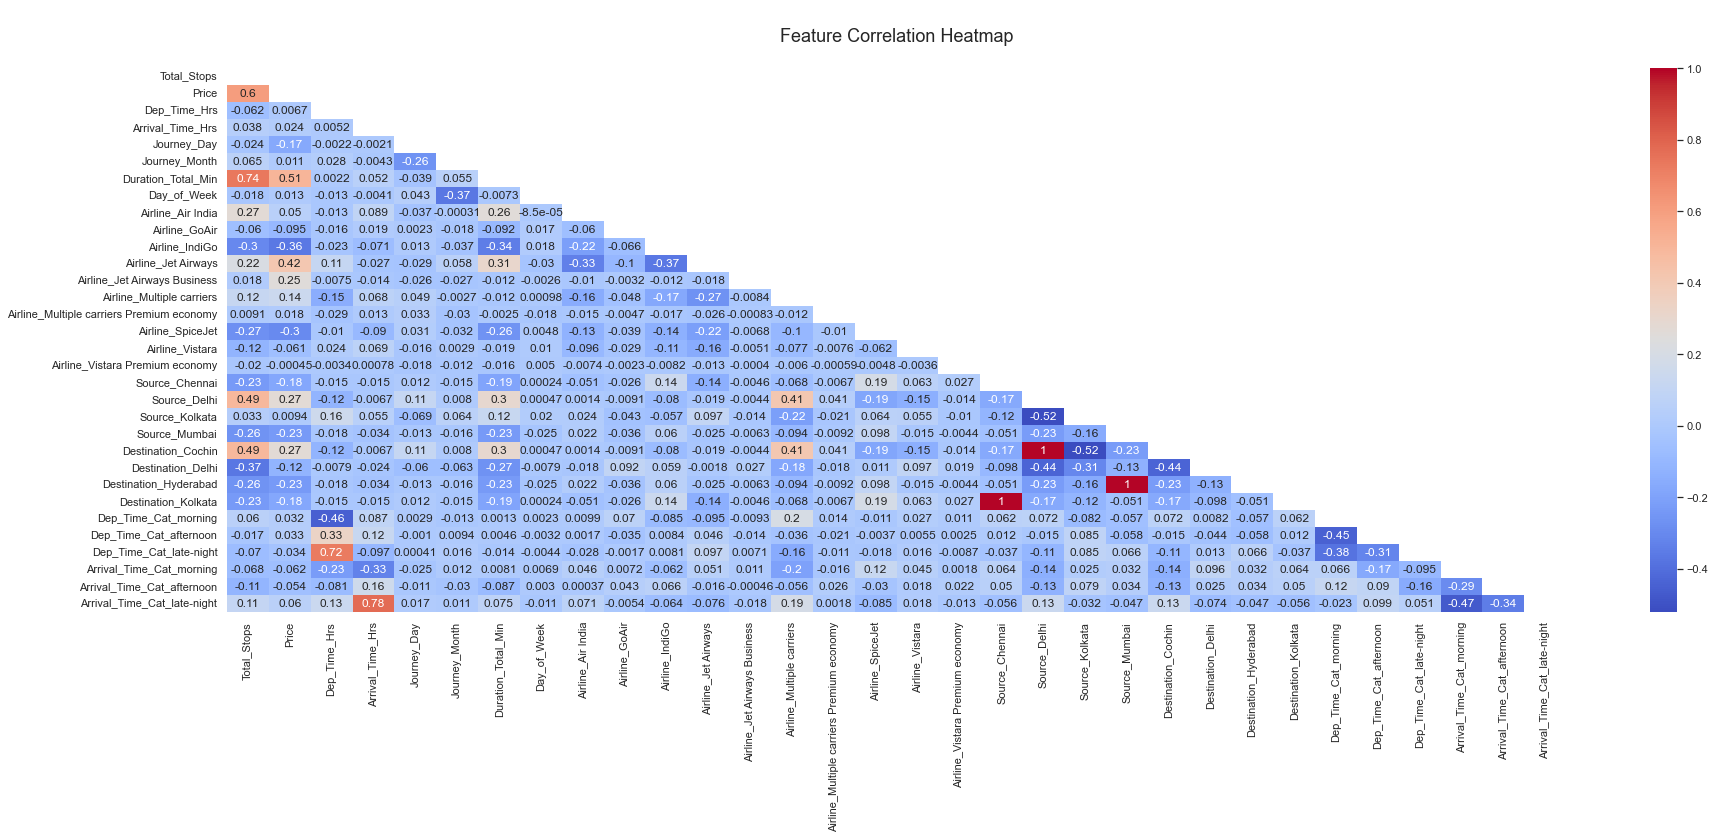

In [80]:
# plot correlation heatmap
half_masked_corr_heatmap(df_train, title='Feature Correlation Heatmap')

In [81]:
df_train.head()

,Total_Stops,Price,Dep_Time_Hrs,Arrival_Time_Hrs,Journey_Day,Journey_Month,Duration_Total_Min,Day_of_Week,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Dep_Time_Cat_morning,Dep_Time_Cat_afternoon,Dep_Time_Cat_late-night,Arrival_Time_Cat_morning,Arrival_Time_Cat_afternoon,Arrival_Time_Cat_late-night
0,0,3897,22,1,24,3,170,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0,0,0
1,2,7662,5,13,5,1,445,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,4,6,9,1140,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0,0,0
3,1,6218,18,23,5,12,325,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0,0,1
4,1,13302,16,21,3,1,285,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0,0,1


In [82]:
# importing required packages
from sklearn.preprocessing import MinMaxScaler

In [83]:
# define scaler instance 
scaler = MinMaxScaler()

In [84]:
# define list of feature need scaling
features_to_scale = ['Total_Stops', 'Price', 'Dep_Time_Hrs', 'Arrival_Time_Hrs', 'Journey_Day', 'Journey_Month', 'Duration_Total_Min']

In [85]:
# scaling features
df_train[features_to_scale] = scaler.fit_transform(df_train[features_to_scale])
df_test[features_to_scale] = scaler.transform(df_test[features_to_scale])

In [86]:
# dropping "Price" feature
df_test.drop('Price', axis=1, inplace=True)
df_test.shape

(2671, 31)

### Model Building

In [89]:
# importing required package
import statsmodels.api as sm

In [87]:
# putting feature variable to X
X = df_train.drop('Price', axis=1)

# putting response variable to y
y = df_train['Price']

In [90]:
# adding constant
X_sm = sm.add_constant(X)

In [92]:
# create model
model_lr = sm.OLS(y, X_sm).fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     586.1
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:06:48   Log-Likelihood:                 19881.
No. Observations:               10680   AIC:                        -3.971e+04
Df Residuals:                   10652   BIC:                        -3.950e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.0371      0.002     15.783      0.000       0.032       0.042
Total_Stops                                   0.1611      0.004     42.228      0.000       0.154       0.169
Dep_Time_Hrs                                 -0.0021      0.006     -0.376      0.707      -0.013       0.009
Arrival_Time_Hrs                             -0.0305      0.005     -5.858      0.000      -0.041      -0.020
Journey_Day                                  -0.0255      0.001    -24.344      0.000      -0.028      -0.023
Journey_Month                                -0.0154      0.002    -10.218      0.000      -0.018      -0.012
Duration_Total_Min                            0.0067      0.003      2.092      0.037       0.000       0.013
Day_of_Week                                   0.0022      0.001      2.325      0.020       0.000       0.004
Airline_Air India                             0.0200      0.002      8.295      0.000       0.015       0.025
Airline_GoAir                                -0.0022      0.003     -0.630      0.529      -0.009       0.005
Airline_IndiGo                                0.0041      0.002      1.774      0.076      -0.000       0.009
Airline_Jet Airways                           0.0561      0.002     24.675      0.000       0.052       0.061
Airline_Jet Airways Business                  0.6272      0.016     40.275      0.000       0.597       0.658
Airline_Multiple carriers                     0.0474      0.003     18.896      0.000       0.042       0.052
Airline_Multiple carriers Premium economy     0.0629      0.011      5.873      0.000       0.042       0.084
Airline_SpiceJet                             -0.0025      0.003     -0.995      0.320      -0.007       0.002
Airline_Vistara                               0.0268      0.003      9.682      0.000       0.021       0.032
Airline_Vistara Premium economy               0.0421      0.022      1.922      0.055      -0.001       0.085
Source_Chennai                                0.0071      0.001      7.259      0.000       0.005       0.009
Source_Delhi                                  0.0042      0.001      7.558      0.000       0.003       0.005
Source_Kolkata                                0.0096      0.001      9.721      0.000       0.008       0.012
Source_Mumbai                                -0.0032      0.001     -4.278      0.000      -0.005      -0.002
Destination_Cochin                            0.0042      0.001      7.558      0.000       0.003       0.005
Destination_Delhi                             0.0193      0.001     20.055      0.000       0.017       0.021
Destination_Hyderabad                        -0.0032      0.001     -4.278      0.000      -0.005      -0.002
Des

In [93]:
X = X.drop('Dep_Time_Hrs', axis=1)
X_sm = sm.add_constant(X)
model_lr = sm.OLS(y, X_sm).fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     608.7
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:08:32   Log-Likelihood:                 19880.
No. Observations:               10680   AIC:                        -3.971e+04
Df Residuals:                   10653   BIC:                        -3.951e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.0367      0.002     17.359      0.000       0.033       0.041
Total_Stops                                   0.1611      0.004     42.229      0.000       0.154       0.169
Arrival_Time_Hrs                             -0.0302      0.005     -5.873      0.000      -0.040      -0.020
Journey_Day                                  -0.0255      0.001    -24.346      0.000      -0.028      -0.023
Journey_Month                                -0.0155      0.002    -10.225      0.000      -0.018      -0.012
Duration_Total_Min                            0.0067      0.003      2.083      0.037       0.000       0.013
Day_of_Week                                   0.0022      0.001      2.331      0.020       0.000       0.004
Airline_Air India                             0.0200      0.002      8.294      0.000       0.015       0.025
Airline_GoAir                                -0.0021      0.003     -0.616      0.538      -0.009       0.005
Airline_IndiGo                                0.0041      0.002      1.780      0.075      -0.000       0.009
Airline_Jet Airways                           0.0561      0.002     24.679      0.000       0.052       0.061
Airline_Jet Airways Business                  0.6272      0.016     40.277      0.000       0.597       0.658
Airline_Multiple carriers                     0.0474      0.003     18.919      0.000       0.043       0.052
Airline_Multiple carriers Premium economy     0.0629      0.011      5.876      0.000       0.042       0.084
Airline_SpiceJet                             -0.0025      0.003     -1.006      0.314      -0.008       0.002
Airline_Vistara                               0.0269      0.003      9.695      0.000       0.021       0.032
Airline_Vistara Premium economy               0.0420      0.022      1.922      0.055      -0.001       0.085
Source_Chennai                                0.0071      0.001      7.271      0.000       0.005       0.009
Source_Delhi                                  0.0041      0.001      7.687      0.000       0.003       0.005
Source_Kolkata                                0.0095      0.001     10.206      0.000       0.008       0.011
Source_Mumbai                                -0.0032      0.001     -4.349      0.000      -0.005      -0.002
Destination_Cochin                            0.0041      0.001      7.687      0.000       0.003       0.005
Destination_Delhi                             0.0192      0.001     21.348      0.000       0.017       0.021
Destination_Hyderabad                        -0.0032      0.001     -4.349      0.000      -0.005      -0.002
Destination_Kolkata                           0.0071      0.001      7.271      0.000       0.005       0.009
Dep

In [94]:
X = X.drop('Airline_GoAir', axis=1)
X_sm = sm.add_constant(X)
model_lr = sm.OLS(y, X_sm).fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     633.1
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:08:59   Log-Likelihood:                 19880.
No. Observations:               10680   AIC:                        -3.971e+04
Df Residuals:                   10654   BIC:                        -3.952e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.0361      0.002     19.212      0.000       0.032       0.040
Total_Stops                                   0.1610      0.004     42.231      0.000       0.154       0.169
Arrival_Time_Hrs                             -0.0302      0.005     -5.866      0.000      -0.040      -0.020
Journey_Day                                  -0.0255      0.001    -24.343      0.000      -0.028      -0.023
Journey_Month                                -0.0154      0.002    -10.222      0.000      -0.018      -0.012
Duration_Total_Min                            0.0067      0.003      2.092      0.036       0.000       0.013
Day_of_Week                                   0.0022      0.001      2.327      0.020       0.000       0.004
Airline_Air India                             0.0208      0.002     10.324      0.000       0.017       0.025
Airline_IndiGo                                0.0049      0.002      2.584      0.010       0.001       0.009
Airline_Jet Airways                           0.0569      0.002     30.553      0.000       0.053       0.061
Airline_Jet Airways Business                  0.6281      0.016     40.481      0.000       0.598       0.658
Airline_Multiple carriers                     0.0483      0.002     22.775      0.000       0.044       0.052
Airline_Multiple carriers Premium economy     0.0637      0.011      6.001      0.000       0.043       0.085
Airline_SpiceJet                             -0.0018      0.002     -0.805      0.421      -0.006       0.003
Airline_Vistara                               0.0277      0.002     11.318      0.000       0.023       0.032
Airline_Vistara Premium economy               0.0429      0.022      1.964      0.050    8.01e-05       0.086
Source_Chennai                                0.0070      0.001      7.255      0.000       0.005       0.009
Source_Delhi                                  0.0040      0.001      7.813      0.000       0.003       0.005
Source_Kolkata                                0.0094      0.001     10.361      0.000       0.008       0.011
Source_Mumbai                                -0.0033      0.001     -4.557      0.000      -0.005      -0.002
Destination_Cochin                            0.0040      0.001      7.813      0.000       0.003       0.005
Destination_Delhi                             0.0190      0.001     22.618      0.000       0.017       0.021
Destination_Hyderabad                        -0.0033      0.001     -4.557      0.000      -0.005      -0.002
Destination_Kolkata                           0.0070      0.001      7.255      0.000       0.005       0.009
Dep_Time_Cat_morning                          0.0031      0.001      2.748      0.006       0.001       0.005
Dep

In [95]:
X = X.drop('Airline_SpiceJet', axis=1)
X_sm = sm.add_constant(X)
model_lr = sm.OLS(y, X_sm).fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     659.5
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:09:22   Log-Likelihood:                 19880.
No. Observations:               10680   AIC:                        -3.971e+04
Df Residuals:                   10655   BIC:                        -3.953e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.0352      0.002     23.421      0.000       0.032       0.038
Total_Stops                                   0.1612      0.004     42.294      0.000       0.154       0.169
Arrival_Time_Hrs                             -0.0302      0.005     -5.869      0.000      -0.040      -0.020
Journey_Day                                  -0.0255      0.001    -24.353      0.000      -0.028      -0.023
Journey_Month                                -0.0154      0.002    -10.212      0.000      -0.018      -0.012
Duration_Total_Min                            0.0067      0.003      2.092      0.036       0.000       0.013
Day_of_Week                                   0.0023      0.001      2.340      0.019       0.000       0.004
Airline_Air India                             0.0218      0.002     13.980      0.000       0.019       0.025
Airline_IndiGo                                0.0060      0.001      4.420      0.000       0.003       0.009
Airline_Jet Airways                           0.0579      0.001     42.703      0.000       0.055       0.061
Airline_Jet Airways Business                  0.6291      0.015     40.679      0.000       0.599       0.659
Airline_Multiple carriers                     0.0493      0.002     28.794      0.000       0.046       0.053
Airline_Multiple carriers Premium economy     0.0647      0.011      6.139      0.000       0.044       0.085
Airline_Vistara                               0.0287      0.002     13.926      0.000       0.025       0.033
Airline_Vistara Premium economy               0.0440      0.022      2.018      0.044       0.001       0.087
Source_Chennai                                0.0068      0.001      7.343      0.000       0.005       0.009
Source_Delhi                                  0.0039      0.001      7.844      0.000       0.003       0.005
Source_Kolkata                                0.0091      0.001     10.676      0.000       0.007       0.011
Source_Mumbai                                -0.0035      0.001     -4.989      0.000      -0.005      -0.002
Destination_Cochin                            0.0039      0.001      7.844      0.000       0.003       0.005
Destination_Delhi                             0.0188      0.001     23.250      0.000       0.017       0.020
Destination_Hyderabad                        -0.0035      0.001     -4.989      0.000      -0.005      -0.002
Destination_Kolkata                           0.0068      0.001      7.343      0.000       0.005       0.009
Dep_Time_Cat_morning                          0.0031      0.001      2.796      0.005       0.001       0.005
Dep_Time_Cat_afternoon                        0.0067      0.001      5.611      0.000       0.004       0.009
Dep

In [96]:
# importing required packages
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Source_Chennai,inf
15,Source_Delhi,inf
21,Destination_Kolkata,inf
20,Destination_Hyderabad,inf
18,Destination_Cochin,inf
17,Source_Mumbai,inf
27,Arrival_Time_Cat_late-night,30.26
1,Arrival_Time_Hrs,17.74
26,Arrival_Time_Cat_afternoon,11.30
16,Source_Kolkata,8.93


In [99]:
X = X.drop('Source_Chennai', axis=1)
X_sm = sm.add_constant(X)
model_lr = sm.OLS(y, X_sm).fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     659.5
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:11:22   Log-Likelihood:                 19880.
No. Observations:               10680   AIC:                        -3.971e+04
Df Residuals:                   10655   BIC:                        -3.953e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.0365      0.002     23.298      0.000       0.033       0.040
Total_Stops                                   0.1612      0.004     42.294      0.000       0.154       0.169
Arrival_Time_Hrs                             -0.0302      0.005     -5.869      0.000      -0.040      -0.020
Journey_Day                                  -0.0255      0.001    -24.353      0.000      -0.028      -0.023
Journey_Month                                -0.0154      0.002    -10.212      0.000      -0.018      -0.012
Duration_Total_Min                            0.0067      0.003      2.092      0.036       0.000       0.013
Day_of_Week                                   0.0023      0.001      2.340      0.019       0.000       0.004
Airline_Air India                             0.0218      0.002     13.980      0.000       0.019       0.025
Airline_IndiGo                                0.0060      0.001      4.420      0.000       0.003       0.009
Airline_Jet Airways                           0.0579      0.001     42.703      0.000       0.055       0.061
Airline_Jet Airways Business                  0.6291      0.015     40.679      0.000       0.599       0.659
Airline_Multiple carriers                     0.0493      0.002     28.794      0.000       0.046       0.053
Airline_Multiple carriers Premium economy     0.0647      0.011      6.139      0.000       0.044       0.085
Airline_Vistara                               0.0287      0.002     13.926      0.000       0.025       0.033
Airline_Vistara Premium economy               0.0440      0.022      2.018      0.044       0.001       0.087
Source_Delhi                                  0.0033      0.001      6.196      0.000       0.002       0.004
Source_Kolkata                                0.0078      0.001      8.574      0.000       0.006       0.010
Source_Mumbai                                -0.0042      0.001     -5.811      0.000      -0.006      -0.003
Destination_Cochin                            0.0033      0.001      6.196      0.000       0.002       0.004
Destination_Delhi                             0.0175      0.001     20.308      0.000       0.016       0.019
Destination_Hyderabad                        -0.0042      0.001     -5.811      0.000      -0.006      -0.003
Destination_Kolkata                           0.0122      0.002      7.343      0.000       0.009       0.015
Dep_Time_Cat_morning                          0.0031      0.001      2.796      0.005       0.001       0.005
Dep_Time_Cat_afternoon                        0.0067      0.001      5.611      0.000       0.004       0.009
Dep_Time_Cat_late-night                       0.0033      0.001      2.633      0.008       0.001       0.006
Arr

In [100]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Destination_Hyderabad,inf
17,Destination_Cochin,inf
16,Source_Mumbai,inf
14,Source_Delhi,inf
26,Arrival_Time_Cat_late-night,30.26
1,Arrival_Time_Hrs,17.74
25,Arrival_Time_Cat_afternoon,11.30
15,Source_Kolkata,8.93
24,Arrival_Time_Cat_morning,6.28
18,Destination_Delhi,6.16


In [101]:
X = X.drop('Destination_Hyderabad', axis=1)
X_sm = sm.add_constant(X)
model_lr = sm.OLS(y, X_sm).fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     659.5
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:12:13   Log-Likelihood:                 19880.
No. Observations:               10680   AIC:                        -3.971e+04
Df Residuals:                   10655   BIC:                        -3.953e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.0358      0.002     22.433      0.000       0.033       0.039
Total_Stops                                   0.1612      0.004     42.294      0.000       0.154       0.169
Arrival_Time_Hrs                             -0.0302      0.005     -5.869      0.000      -0.040      -0.020
Journey_Day                                  -0.0255      0.001    -24.353      0.000      -0.028      -0.023
Journey_Month                                -0.0154      0.002    -10.212      0.000      -0.018      -0.012
Duration_Total_Min                            0.0067      0.003      2.092      0.036       0.000       0.013
Day_of_Week                                   0.0023      0.001      2.340      0.019       0.000       0.004
Airline_Air India                             0.0218      0.002     13.980      0.000       0.019       0.025
Airline_IndiGo                                0.0060      0.001      4.420      0.000       0.003       0.009
Airline_Jet Airways                           0.0579      0.001     42.703      0.000       0.055       0.061
Airline_Jet Airways Business                  0.6291      0.015     40.679      0.000       0.599       0.659
Airline_Multiple carriers                     0.0493      0.002     28.794      0.000       0.046       0.053
Airline_Multiple carriers Premium economy     0.0647      0.011      6.139      0.000       0.044       0.085
Airline_Vistara                               0.0287      0.002     13.926      0.000       0.025       0.033
Airline_Vistara Premium economy               0.0440      0.022      2.018      0.044       0.001       0.087
Source_Delhi                                  0.0036      0.001      6.847      0.000       0.003       0.005
Source_Kolkata                                0.0085      0.001      9.277      0.000       0.007       0.010
Source_Mumbai                                -0.0076      0.001     -5.811      0.000      -0.010      -0.005
Destination_Cochin                            0.0036      0.001      6.847      0.000       0.003       0.005
Destination_Delhi                             0.0182      0.001     20.986      0.000       0.017       0.020
Destination_Kolkata                           0.0130      0.002      7.622      0.000       0.010       0.016
Dep_Time_Cat_morning                          0.0031      0.001      2.796      0.005       0.001       0.005
Dep_Time_Cat_afternoon                        0.0067      0.001      5.611      0.000       0.004       0.009
Dep_Time_Cat_late-night                       0.0033      0.001      2.633      0.008       0.001       0.006
Arrival_Time_Cat_morning                      0.0061      0.002      3.024      0.002       0.002       0.010
Arr

In [102]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Destination_Cochin,inf
14,Source_Delhi,inf
25,Arrival_Time_Cat_late-night,30.26
1,Arrival_Time_Hrs,17.74
24,Arrival_Time_Cat_afternoon,11.30
15,Source_Kolkata,8.93
23,Arrival_Time_Cat_morning,6.28
18,Destination_Delhi,6.16
8,Airline_Jet Airways,3.19
0,Total_Stops,3.12


In [103]:
X = X.drop('Destination_Cochin', axis=1)
X_sm = sm.add_constant(X)
model_lr = sm.OLS(y, X_sm).fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     659.5
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:12:27   Log-Likelihood:                 19880.
No. Observations:               10680   AIC:                        -3.971e+04
Df Residuals:                   10655   BIC:                        -3.953e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.0364      0.002     22.449      0.000       0.033       0.040
Total_Stops                                   0.1612      0.004     42.294      0.000       0.154       0.169
Arrival_Time_Hrs                             -0.0302      0.005     -5.869      0.000      -0.040      -0.020
Journey_Day                                  -0.0255      0.001    -24.353      0.000      -0.028      -0.023
Journey_Month                                -0.0154      0.002    -10.212      0.000      -0.018      -0.012
Duration_Total_Min                            0.0067      0.003      2.092      0.036       0.000       0.013
Day_of_Week                                   0.0023      0.001      2.340      0.019       0.000       0.004
Airline_Air India                             0.0218      0.002     13.980      0.000       0.019       0.025
Airline_IndiGo                                0.0060      0.001      4.420      0.000       0.003       0.009
Airline_Jet Airways                           0.0579      0.001     42.703      0.000       0.055       0.061
Airline_Jet Airways Business                  0.6291      0.015     40.679      0.000       0.599       0.659
Airline_Multiple carriers                     0.0493      0.002     28.794      0.000       0.046       0.053
Airline_Multiple carriers Premium economy     0.0647      0.011      6.139      0.000       0.044       0.085
Airline_Vistara                               0.0287      0.002     13.926      0.000       0.025       0.033
Airline_Vistara Premium economy               0.0440      0.022      2.018      0.044       0.001       0.087
Source_Delhi                                  0.0067      0.001      6.847      0.000       0.005       0.009
Source_Kolkata                                0.0079      0.001      8.986      0.000       0.006       0.010
Source_Mumbai                                -0.0082      0.001     -6.203      0.000      -0.011      -0.006
Destination_Delhi                             0.0176      0.001     20.524      0.000       0.016       0.019
Destination_Kolkata                           0.0124      0.002      7.151      0.000       0.009       0.016
Dep_Time_Cat_morning                          0.0031      0.001      2.796      0.005       0.001       0.005
Dep_Time_Cat_afternoon                        0.0067      0.001      5.611      0.000       0.004       0.009
Dep_Time_Cat_late-night                       0.0033      0.001      2.633      0.008       0.001       0.006
Arrival_Time_Cat_morning                      0.0061      0.002      3.024      0.002       0.002       0.010
Arrival_Time_Cat_afternoon                    0.0160      0.003      4.949      0.000       0.010       0.022
Arr

In [104]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,Arrival_Time_Cat_late-night,30.26
1,Arrival_Time_Hrs,17.74
14,Source_Delhi,14.61
23,Arrival_Time_Cat_afternoon,11.30
15,Source_Kolkata,8.93
22,Arrival_Time_Cat_morning,6.28
17,Destination_Delhi,6.16
8,Airline_Jet Airways,3.19
0,Total_Stops,3.12
4,Duration_Total_Min,2.58


In [105]:
X = X.drop('Arrival_Time_Cat_late-night', axis=1)
X_sm = sm.add_constant(X)
model_lr = sm.OLS(y, X_sm).fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     685.5
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:12:48   Log-Likelihood:                 19867.
No. Observations:               10680   AIC:                        -3.969e+04
Df Residuals:                   10656   BIC:                        -3.951e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.0355      0.002     22.016      0.000       0.032       0.039
Total_Stops                                   0.1600      0.004     42.017      0.000       0.152       0.167
Arrival_Time_Hrs                             -0.0054      0.001     -4.048      0.000      -0.008      -0.003
Journey_Day                                  -0.0255      0.001    -24.312      0.000      -0.028      -0.023
Journey_Month                                -0.0153      0.002    -10.118      0.000      -0.018      -0.012
Duration_Total_Min                            0.0074      0.003      2.317      0.020       0.001       0.014
Day_of_Week                                   0.0022      0.001      2.257      0.024       0.000       0.004
Airline_Air India                             0.0220      0.002     14.090      0.000       0.019       0.025
Airline_IndiGo                                0.0056      0.001      4.128      0.000       0.003       0.008
Airline_Jet Airways                           0.0570      0.001     42.377      0.000       0.054       0.060
Airline_Jet Airways Business                  0.6277      0.015     40.551      0.000       0.597       0.658
Airline_Multiple carriers                     0.0496      0.002     28.959      0.000       0.046       0.053
Airline_Multiple carriers Premium economy     0.0645      0.011      6.110      0.000       0.044       0.085
Airline_Vistara                               0.0281      0.002     13.622      0.000       0.024       0.032
Airline_Vistara Premium economy               0.0436      0.022      1.997      0.046       0.001       0.086
Source_Delhi                                  0.0065      0.001      6.650      0.000       0.005       0.008
Source_Kolkata                                0.0075      0.001      8.534      0.000       0.006       0.009
Source_Mumbai                                -0.0081      0.001     -6.164      0.000      -0.011      -0.006
Destination_Delhi                             0.0173      0.001     20.189      0.000       0.016       0.019
Destination_Kolkata                           0.0124      0.002      7.153      0.000       0.009       0.016
Dep_Time_Cat_morning                          0.0030      0.001      2.645      0.008       0.001       0.005
Dep_Time_Cat_afternoon                        0.0066      0.001      5.448      0.000       0.004       0.009
Dep_Time_Cat_late-night                       0.0031      0.001      2.445      0.014       0.001       0.006
Arrival_Time_Cat_morning                     -0.0027      0.001     -2.774      0.006      -0.005      -0.001
Arrival_Time_Cat_afternoon                    0.0008      0.001      0.729      0.466      -0.001       0.003
===

In [106]:
X = X.drop('Arrival_Time_Cat_afternoon', axis=1)
X_sm = sm.add_constant(X)
model_lr = sm.OLS(y, X_sm).fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     716.7
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:13:22   Log-Likelihood:                 19867.
No. Observations:               10680   AIC:                        -3.969e+04
Df Residuals:                   10657   BIC:                        -3.952e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.0357      0.002     22.487      0.000       0.033       0.039
Total_Stops                                   0.1597      0.004     42.089      0.000       0.152       0.167
Arrival_Time_Hrs                             -0.0054      0.001     -4.032      0.000      -0.008      -0.003
Journey_Day                                  -0.0255      0.001    -24.322      0.000      -0.028      -0.023
Journey_Month                                -0.0153      0.002    -10.137      0.000      -0.018      -0.012
Duration_Total_Min                            0.0074      0.003      2.315      0.021       0.001       0.014
Day_of_Week                                   0.0022      0.001      2.253      0.024       0.000       0.004
Airline_Air India                             0.0220      0.002     14.138      0.000       0.019       0.025
Airline_IndiGo                                0.0056      0.001      4.153      0.000       0.003       0.008
Airline_Jet Airways                           0.0570      0.001     42.460      0.000       0.054       0.060
Airline_Jet Airways Business                  0.6278      0.015     40.563      0.000       0.597       0.658
Airline_Multiple carriers                     0.0495      0.002     28.972      0.000       0.046       0.053
Airline_Multiple carriers Premium economy     0.0647      0.011      6.132      0.000       0.044       0.085
Airline_Vistara                               0.0281      0.002     13.639      0.000       0.024       0.032
Airline_Vistara Premium economy               0.0439      0.022      2.011      0.044       0.001       0.087
Source_Delhi                                  0.0065      0.001      6.642      0.000       0.005       0.008
Source_Kolkata                                0.0076      0.001      8.667      0.000       0.006       0.009
Source_Mumbai                                -0.0081      0.001     -6.135      0.000      -0.011      -0.005
Destination_Delhi                             0.0173      0.001     20.227      0.000       0.016       0.019
Destination_Kolkata                           0.0125      0.002      7.207      0.000       0.009       0.016
Dep_Time_Cat_morning                          0.0030      0.001      2.712      0.007       0.001       0.005
Dep_Time_Cat_afternoon                        0.0066      0.001      5.448      0.000       0.004       0.009
Dep_Time_Cat_late-night                       0.0030      0.001      2.362      0.018       0.001       0.005
Arrival_Time_Cat_morning                     -0.0029      0.001     -3.176      0.001      -0.005      -0.001
==============================================================================
Omnibus:                     6126.

In [107]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Source_Delhi,14.24
15,Source_Kolkata,8.50
17,Destination_Delhi,5.92
8,Airline_Jet Airways,3.12
0,Total_Stops,3.08
4,Duration_Total_Min,2.58
6,Airline_Air India,2.50
16,Source_Mumbai,2.50
10,Airline_Multiple carriers,2.18
19,Dep_Time_Cat_morning,2.16


In [108]:
X = X.drop('Source_Delhi', axis=1)
X_sm = sm.add_constant(X)
model_lr = sm.OLS(y, X_sm).fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     716.7
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:13:35   Log-Likelihood:                 19867.
No. Observations:               10680   AIC:                        -3.969e+04
Df Residuals:                   10657   BIC:                        -3.952e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.0422      0.002     19.971      0.000       0.038       0.046
Total_Stops                                   0.1597      0.004     42.089      0.000       0.152       0.167
Arrival_Time_Hrs                             -0.0054      0.001     -4.032      0.000      -0.008      -0.003
Journey_Day                                  -0.0255      0.001    -24.322      0.000      -0.028      -0.023
Journey_Month                                -0.0153      0.002    -10.137      0.000      -0.018      -0.012
Duration_Total_Min                            0.0074      0.003      2.315      0.021       0.001       0.014
Day_of_Week                                   0.0022      0.001      2.253      0.024       0.000       0.004
Airline_Air India                             0.0220      0.002     14.138      0.000       0.019       0.025
Airline_IndiGo                                0.0056      0.001      4.153      0.000       0.003       0.008
Airline_Jet Airways                           0.0570      0.001     42.460      0.000       0.054       0.060
Airline_Jet Airways Business                  0.6278      0.015     40.563      0.000       0.597       0.658
Airline_Multiple carriers                     0.0495      0.002     28.972      0.000       0.046       0.053
Airline_Multiple carriers Premium economy     0.0647      0.011      6.132      0.000       0.044       0.085
Airline_Vistara                               0.0281      0.002     13.639      0.000       0.024       0.032
Airline_Vistara Premium economy               0.0439      0.022      2.011      0.044       0.001       0.087
Source_Kolkata                                0.0011      0.001      1.077      0.281      -0.001       0.003
Source_Mumbai                                -0.0145      0.002     -8.114      0.000      -0.018      -0.011
Destination_Delhi                             0.0109      0.001      8.644      0.000       0.008       0.013
Destination_Kolkata                           0.0060      0.002      2.667      0.008       0.002       0.010
Dep_Time_Cat_morning                          0.0030      0.001      2.712      0.007       0.001       0.005
Dep_Time_Cat_afternoon                        0.0066      0.001      5.448      0.000       0.004       0.009
Dep_Time_Cat_late-night                       0.0030      0.001      2.362      0.018       0.001       0.005
Arrival_Time_Cat_morning                     -0.0029      0.001     -3.176      0.001      -0.005      -0.001
==============================================================================
Omnibus:                     6126.077   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        

In [109]:
X = X.drop('Source_Kolkata', axis=1)
X_sm = sm.add_constant(X)
model_lr = sm.OLS(y, X_sm).fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     750.8
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:14:00   Log-Likelihood:                 19867.
No. Observations:               10680   AIC:                        -3.969e+04
Df Residuals:                   10658   BIC:                        -3.953e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.0429      0.002     21.279      0.000       0.039       0.047
Total_Stops                                   0.1587      0.004     43.248      0.000       0.152       0.166
Arrival_Time_Hrs                             -0.0053      0.001     -3.971      0.000      -0.008      -0.003
Journey_Day                                  -0.0256      0.001    -24.561      0.000      -0.028      -0.024
Journey_Month                                -0.0153      0.002    -10.122      0.000      -0.018      -0.012
Duration_Total_Min                            0.0076      0.003      2.379      0.017       0.001       0.014
Day_of_Week                                   0.0022      0.001      2.266      0.023       0.000       0.004
Airline_Air India                             0.0220      0.002     14.128      0.000       0.019       0.025
Airline_IndiGo                                0.0055      0.001      4.069      0.000       0.003       0.008
Airline_Jet Airways                           0.0570      0.001     42.446      0.000       0.054       0.060
Airline_Jet Airways Business                  0.6278      0.015     40.562      0.000       0.597       0.658
Airline_Multiple carriers                     0.0490      0.002     29.928      0.000       0.046       0.052
Airline_Multiple carriers Premium economy     0.0642      0.011      6.091      0.000       0.044       0.085
Airline_Vistara                               0.0281      0.002     13.670      0.000       0.024       0.032
Airline_Vistara Premium economy               0.0437      0.022      2.005      0.045       0.001       0.086
Source_Mumbai                                -0.0152      0.002     -9.115      0.000      -0.018      -0.012
Destination_Delhi                             0.0102      0.001      9.360      0.000       0.008       0.012
Destination_Kolkata                           0.0053      0.002      2.456      0.014       0.001       0.009
Dep_Time_Cat_morning                          0.0031      0.001      2.769      0.006       0.001       0.005
Dep_Time_Cat_afternoon                        0.0066      0.001      5.534      0.000       0.004       0.009
Dep_Time_Cat_late-night                       0.0031      0.001      2.453      0.014       0.001       0.006
Arrival_Time_Cat_morning                     -0.0029      0.001     -3.130      0.002      -0.005      -0.001
==============================================================================
Omnibus:                     6127.422   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           164796.704
Skew:                           2.248   Prob(JB):                         0.00
Kurtosis:        

In [110]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total_Stops,6.77
4,Duration_Total_Min,5.77
1,Arrival_Time_Hrs,4.84
8,Airline_Jet Airways,4.43
3,Journey_Month,3.50
17,Dep_Time_Cat_morning,2.90
6,Airline_Air India,2.85
18,Dep_Time_Cat_afternoon,2.44
2,Journey_Day,2.15
7,Airline_IndiGo,2.09


In [111]:
X = X.drop('Total_Stops', axis=1)
X_sm = sm.add_constant(X)
model_lr = sm.OLS(y, X_sm).fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     591.1
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:14:26   Log-Likelihood:                 19003.
No. Observations:               10680   AIC:                        -3.796e+04
Df Residuals:                   10659   BIC:                        -3.781e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.0637      0.002     30.031      0.000       0.060       0.068
Arrival_Time_Hrs                             -0.0087      0.001     -6.028      0.000      -0.012      -0.006
Journey_Day                                  -0.0264      0.001    -23.424      0.000      -0.029      -0.024
Journey_Month                                -0.0148      0.002     -9.034      0.000      -0.018      -0.012
Duration_Total_Min                            0.0849      0.003     29.421      0.000       0.079       0.091
Day_of_Week                                   0.0012      0.001      1.192      0.233      -0.001       0.003
Airline_Air India                             0.0366      0.002     22.161      0.000       0.033       0.040
Airline_IndiGo                                0.0075      0.001      5.178      0.000       0.005       0.010
Airline_Jet Airways                           0.0652      0.001     45.267      0.000       0.062       0.068
Airline_Jet Airways Business                  0.6666      0.017     39.792      0.000       0.634       0.699
Airline_Multiple carriers                     0.0582      0.002     33.117      0.000       0.055       0.062
Airline_Multiple carriers Premium economy     0.0719      0.011      6.291      0.000       0.049       0.094
Airline_Vistara                               0.0256      0.002     11.467      0.000       0.021       0.030
Airline_Vistara Premium economy               0.0422      0.024      1.787      0.074      -0.004       0.089
Source_Mumbai                                -0.0335      0.002    -19.120      0.000      -0.037      -0.030
Destination_Delhi                            -0.0056      0.001     -5.004      0.000      -0.008      -0.003
Destination_Kolkata                          -0.0133      0.002     -5.845      0.000      -0.018      -0.009
Dep_Time_Cat_morning                          0.0031      0.001      2.560      0.010       0.001       0.005
Dep_Time_Cat_afternoon                        0.0024      0.001      1.856      0.063      -0.000       0.005
Dep_Time_Cat_late-night                      -0.0019      0.001     -1.381      0.167      -0.005       0.001
Arrival_Time_Cat_morning                     -0.0064      0.001     -6.409      0.000      -0.008      -0.004
==============================================================================
Omnibus:                     5776.442   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           124447.860
Skew:                           2.137   Prob(JB):                         0.00
Kurtosis:                      19.168   Cond. No.                         92.2
================================================

In [112]:
X = X.drop('Day_of_Week', axis=1)
X_sm = sm.add_constant(X)
model_lr = sm.OLS(y, X_sm).fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     622.1
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:14:45   Log-Likelihood:                 19003.
No. Observations:               10680   AIC:                        -3.797e+04
Df Residuals:                   10660   BIC:                        -3.782e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.0643      0.002     31.344      0.000       0.060       0.068
Arrival_Time_Hrs                             -0.0087      0.001     -6.031      0.000      -0.012      -0.006
Journey_Day                                  -0.0265      0.001    -23.551      0.000      -0.029      -0.024
Journey_Month                                -0.0155      0.002    -10.223      0.000      -0.019      -0.013
Duration_Total_Min                            0.0849      0.003     29.413      0.000       0.079       0.091
Airline_Air India                             0.0366      0.002     22.153      0.000       0.033       0.040
Airline_IndiGo                                0.0075      0.001      5.178      0.000       0.005       0.010
Airline_Jet Airways                           0.0652      0.001     45.256      0.000       0.062       0.068
Airline_Jet Airways Business                  0.6663      0.017     39.778      0.000       0.633       0.699
Airline_Multiple carriers                     0.0582      0.002     33.105      0.000       0.055       0.062
Airline_Multiple carriers Premium economy     0.0715      0.011      6.257      0.000       0.049       0.094
Airline_Vistara                               0.0256      0.002     11.478      0.000       0.021       0.030
Airline_Vistara Premium economy               0.0422      0.024      1.786      0.074      -0.004       0.089
Source_Mumbai                                -0.0336      0.002    -19.190      0.000      -0.037      -0.030
Destination_Delhi                            -0.0056      0.001     -5.069      0.000      -0.008      -0.003
Destination_Kolkata                          -0.0134      0.002     -5.869      0.000      -0.018      -0.009
Dep_Time_Cat_morning                          0.0031      0.001      2.557      0.011       0.001       0.005
Dep_Time_Cat_afternoon                        0.0024      0.001      1.853      0.064      -0.000       0.005
Dep_Time_Cat_late-night                      -0.0019      0.001     -1.379      0.168      -0.004       0.001
Arrival_Time_Cat_morning                     -0.0064      0.001     -6.393      0.000      -0.008      -0.004
==============================================================================
Omnibus:                     5752.480   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123286.529
Skew:                           2.126   Prob(JB):                         0.00
Kurtosis:                      19.092   Cond. No.                         91.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is 

In [113]:
X = X.drop('Airline_Vistara Premium economy', axis=1)
X_sm = sm.add_constant(X)
model_lr = sm.OLS(y, X_sm).fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     656.4
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:15:05   Log-Likelihood:                 19001.
No. Observations:               10680   AIC:                        -3.796e+04
Df Residuals:                   10661   BIC:                        -3.783e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.0644      0.002     31.404      0.000       0.060       0.068
Arrival_Time_Hrs                             -0.0087      0.001     -6.029      0.000      -0.012      -0.006
Journey_Day                                  -0.0266      0.001    -23.592      0.000      -0.029      -0.024
Journey_Month                                -0.0156      0.002    -10.250      0.000      -0.019      -0.013
Duration_Total_Min                            0.0849      0.003     29.418      0.000       0.079       0.091
Airline_Air India                             0.0365      0.002     22.105      0.000       0.033       0.040
Airline_IndiGo                                0.0074      0.001      5.115      0.000       0.005       0.010
Airline_Jet Airways                           0.0651      0.001     45.216      0.000       0.062       0.068
Airline_Jet Airways Business                  0.6662      0.017     39.767      0.000       0.633       0.699
Airline_Multiple carriers                     0.0581      0.002     33.065      0.000       0.055       0.062
Airline_Multiple carriers Premium economy     0.0714      0.011      6.249      0.000       0.049       0.094
Airline_Vistara                               0.0255      0.002     11.434      0.000       0.021       0.030
Source_Mumbai                                -0.0336      0.002    -19.188      0.000      -0.037      -0.030
Destination_Delhi                            -0.0056      0.001     -5.038      0.000      -0.008      -0.003
Destination_Kolkata                          -0.0133      0.002     -5.828      0.000      -0.018      -0.009
Dep_Time_Cat_morning                          0.0031      0.001      2.571      0.010       0.001       0.006
Dep_Time_Cat_afternoon                        0.0024      0.001      1.864      0.062      -0.000       0.005
Dep_Time_Cat_late-night                      -0.0019      0.001     -1.381      0.167      -0.005       0.001
Arrival_Time_Cat_morning                     -0.0064      0.001     -6.401      0.000      -0.008      -0.004
==============================================================================
Omnibus:                     5748.233   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123006.847
Skew:                           2.125   Prob(JB):                         0.00
Kurtosis:                      19.074   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
X = X.drop('Dep_Time_Cat_afternoon', axis=1)
X_sm = sm.add_constant(X)
model_lr = sm.OLS(y, X_sm).fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     694.6
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:15:23   Log-Likelihood:                 18999.
No. Observations:               10680   AIC:                        -3.796e+04
Df Residuals:                   10662   BIC:                        -3.783e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.0660      0.002     35.163      0.000       0.062       0.070
Arrival_Time_Hrs                             -0.0085      0.001     -5.891      0.000      -0.011      -0.006
Journey_Day                                  -0.0266      0.001    -23.595      0.000      -0.029      -0.024
Journey_Month                                -0.0156      0.002    -10.234      0.000      -0.019      -0.013
Duration_Total_Min                            0.0845      0.003     29.356      0.000       0.079       0.090
Airline_Air India                             0.0365      0.002     22.152      0.000       0.033       0.040
Airline_IndiGo                                0.0073      0.001      5.040      0.000       0.004       0.010
Airline_Jet Airways                           0.0652      0.001     45.374      0.000       0.062       0.068
Airline_Jet Airways Business                  0.6656      0.017     39.735      0.000       0.633       0.698
Airline_Multiple carriers                     0.0580      0.002     33.021      0.000       0.055       0.061
Airline_Multiple carriers Premium economy     0.0707      0.011      6.192      0.000       0.048       0.093
Airline_Vistara                               0.0257      0.002     11.545      0.000       0.021       0.030
Source_Mumbai                                -0.0339      0.002    -19.433      0.000      -0.037      -0.030
Destination_Delhi                            -0.0057      0.001     -5.147      0.000      -0.008      -0.004
Destination_Kolkata                          -0.0131      0.002     -5.745      0.000      -0.018      -0.009
Dep_Time_Cat_morning                          0.0016      0.001      1.786      0.074      -0.000       0.003
Dep_Time_Cat_late-night                      -0.0034      0.001     -3.171      0.002      -0.005      -0.001
Arrival_Time_Cat_morning                     -0.0068      0.001     -6.960      0.000      -0.009      -0.005
==============================================================================
Omnibus:                     5755.396   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           123519.965
Skew:                           2.127   Prob(JB):                         0.00
Kurtosis:                      19.108   Cond. No.                         63.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
X = X.drop('Dep_Time_Cat_morning', axis=1)
X_sm = sm.add_constant(X)
model_lr = sm.OLS(y, X_sm).fit()
model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     737.7
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:15:38   Log-Likelihood:                 18998.
No. Observations:               10680   AIC:                        -3.796e+04
Df Residuals:                   10663   BIC:                        -3.784e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.0666      0.002     36.024      0.000       0.063       0.070
Arrival_Time_Hrs                             -0.0083      0.001     -5.787      0.000      -0.011      -0.005
Journey_Day                                  -0.0266      0.001    -23.598      0.000      -0.029      -0.024
Journey_Month                                -0.0156      0.002    -10.244      0.000      -0.019      -0.013
Duration_Total_Min                            0.0846      0.003     29.373      0.000       0.079       0.090
Airline_Air India                             0.0365      0.002     22.124      0.000       0.033       0.040
Airline_IndiGo                                0.0072      0.001      4.939      0.000       0.004       0.010
Airline_Jet Airways                           0.0651      0.001     45.335      0.000       0.062       0.068
Airline_Jet Airways Business                  0.6653      0.017     39.716      0.000       0.632       0.698
Airline_Multiple carriers                     0.0584      0.002     33.418      0.000       0.055       0.062
Airline_Multiple carriers Premium economy     0.0709      0.011      6.211      0.000       0.049       0.093
Airline_Vistara                               0.0258      0.002     11.558      0.000       0.021       0.030
Source_Mumbai                                -0.0339      0.002    -19.441      0.000      -0.037      -0.030
Destination_Delhi                            -0.0056      0.001     -5.073      0.000      -0.008      -0.003
Destination_Kolkata                          -0.0128      0.002     -5.639      0.000      -0.017      -0.008
Dep_Time_Cat_late-night                      -0.0040      0.001     -4.020      0.000      -0.006      -0.002
Arrival_Time_Cat_morning                     -0.0067      0.001     -6.847      0.000      -0.009      -0.005
==============================================================================
Omnibus:                     5746.176   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           122823.511
Skew:                           2.124   Prob(JB):                         0.00
Kurtosis:                      19.061   Cond. No.                         61.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Arrival_Time_Hrs,4.24
6,Airline_Jet Airways,3.93
3,Duration_Total_Min,3.79
2,Journey_Month,3.01
4,Airline_Air India,2.53
1,Journey_Day,2.07
5,Airline_IndiGo,1.92
8,Airline_Multiple carriers,1.71
15,Arrival_Time_Cat_morning,1.51
12,Destination_Delhi,1.49


In [117]:
# get prediction
y_pred = model_lr.predict(X_sm)

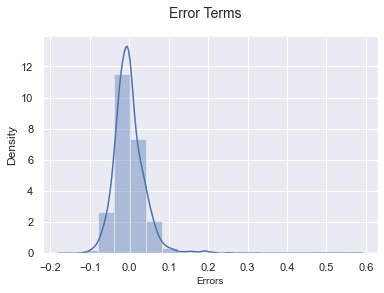

In [118]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y - y_pred), bins = 18)
# Plot heading 
fig.suptitle('Error Terms', fontsize = 14)  
# X-label
plt.xlabel('Errors', fontsize=10)     
plt.show()

### Evaluating Model

In [120]:
X_test = df_test[X.columns]

In [123]:
X_test.shape

(2671, 16)

In [121]:
X_test_sm = sm.add_constant(X_test)

In [122]:
y_pred_test = model_lr.predict(X_test_sm)

### Using Random Forest Regressor

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
# putting feature variable to X
X = df_train.drop('Price', axis=1)

# putting response variable to y
y = df_train['Price']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [130]:
from sklearn.ensemble import RandomForestRegressor

In [132]:
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 15)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

In [133]:
from sklearn.metrics import r2_score

In [134]:
r2_score(y_test, y_pred)

0.7852944181150663

In [135]:
test_pred = rf_regressor.predict(df_test)

In [136]:
pd.DataFrame({'Price': test_pred})

,Price
0,0.116537
1,0.033883
2,0.169088
3,0.101436
4,0.028752
...,...
2666,0.108581
2667,0.039010
2668,0.168728
2669,0.134109
